In [1]:
# basic stuff
import numpy as np
import pandas as pd
import time

# other sklearn libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, LabelBinarizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier

# models
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.mixture import GaussianMixture
#import xgboost as xgb
#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Data

## Loading Data

In [2]:
data = pd.read_csv('data/train.csv')
data.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [3]:
data[data['Artist Name'] == 'Led Zeppelin'].head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
266,Led Zeppelin,No Quarter - Remaster,56.0,0.339,0.340,11.0,-14.377,1,0.0385,0.6570,0.459000,0.375,0.117,142.362,419133.0,4,10
3957,Led Zeppelin,The Ocean - Remaster,56.0,0.443,0.555,4.0,-9.303,0,0.0474,0.0533,0.024000,0.311,0.755,87.982,271027.0,4,10
4363,Led Zeppelin,Since I've Been Loving You - Remaster,63.0,0.393,0.364,5.0,-10.945,0,0.0345,0.0021,0.070300,0.121,0.308,118.566,444148.0,3,2
4884,Led Zeppelin,Kashmir - Remaster,70.0,0.480,0.536,2.0,-11.166,1,0.0427,0.4880,0.000042,0.155,0.581,80.617,508200.0,3,10
5426,Led Zeppelin,Immigrant Song - Remaster,77.0,0.564,0.932,11.0,-10.068,1,0.0554,0.0130,0.169000,0.349,0.619,112.937,146250.0,4,1


In [8]:
#X is all of the features from popularity to time_signature; we are not including artist or track name
X_df=data.iloc[:, 2:16]
X = X_df.to_numpy()
#y is target variable 'Class' which is numbers 0,1,2,..., 10 representing 11 genres
y_df=data.iloc[:, 16]
y = y_df.to_numpy()

## Exploratory Data Analysis

In [20]:
data.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


array([[<AxesSubplot:title={'center':'Popularity'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>],
       [<AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>],
       [<AxesSubplot:title={'center':'duration_in min/ms'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

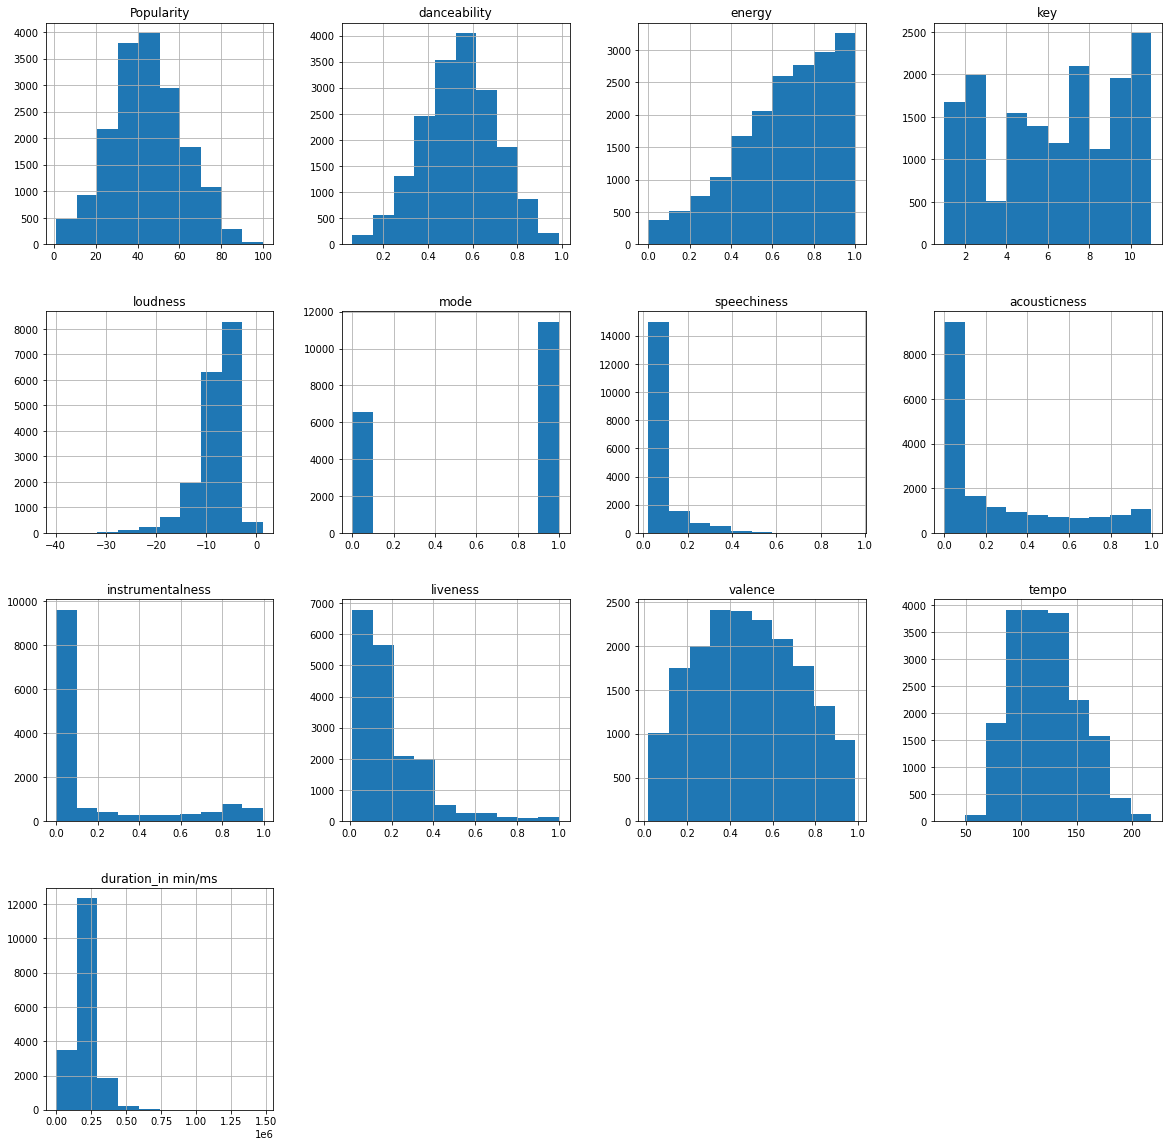

In [12]:
X_df.hist(figsize=(20,20))

The above charts show the distribution of values for the various features. These features are all in different ranges, so they will be scaled later

In [10]:
#labels for distribution plot below, in order of # of data points desc
labels_distribution=['Rock', 'Indie', 'Pop', 'Metal', 'Hip-Hop', 'Alt', 'Blues', 'Acoustic', 'Instrumental', 'Bollywood', 'Country']

Text(0.5, 1.0, 'Distribution of Classes')

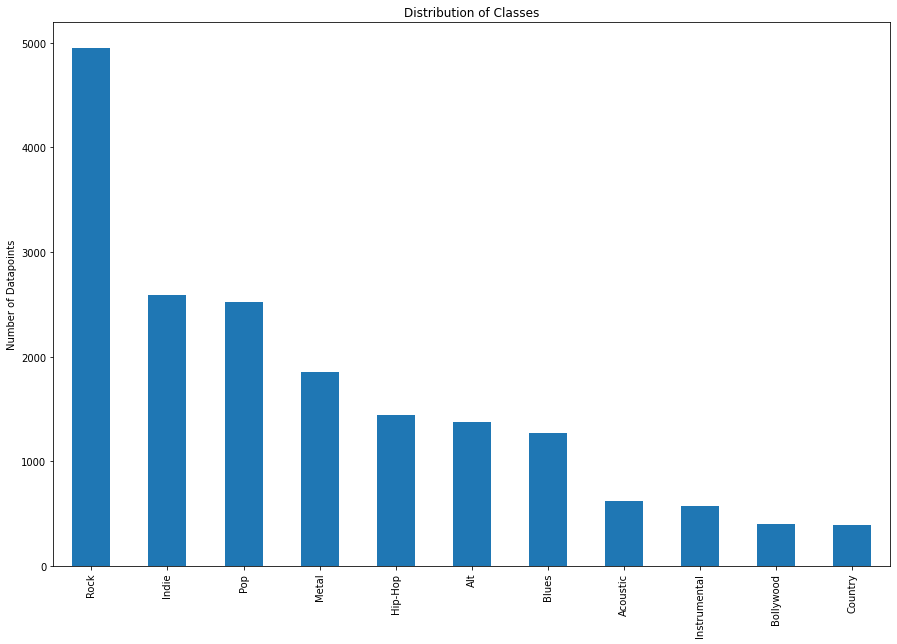

In [11]:
plt.figure(figsize=(15,10))
y_df.value_counts().plot(kind='bar')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10], labels_distribution)
plt.ylabel('Number of Datapoints')
plt.title('Distribution of Classes')

We see that we have an unbalanced dataset, so we will utilize other metrics in addition to accuracy to measure performance of the models.

<AxesSubplot:>

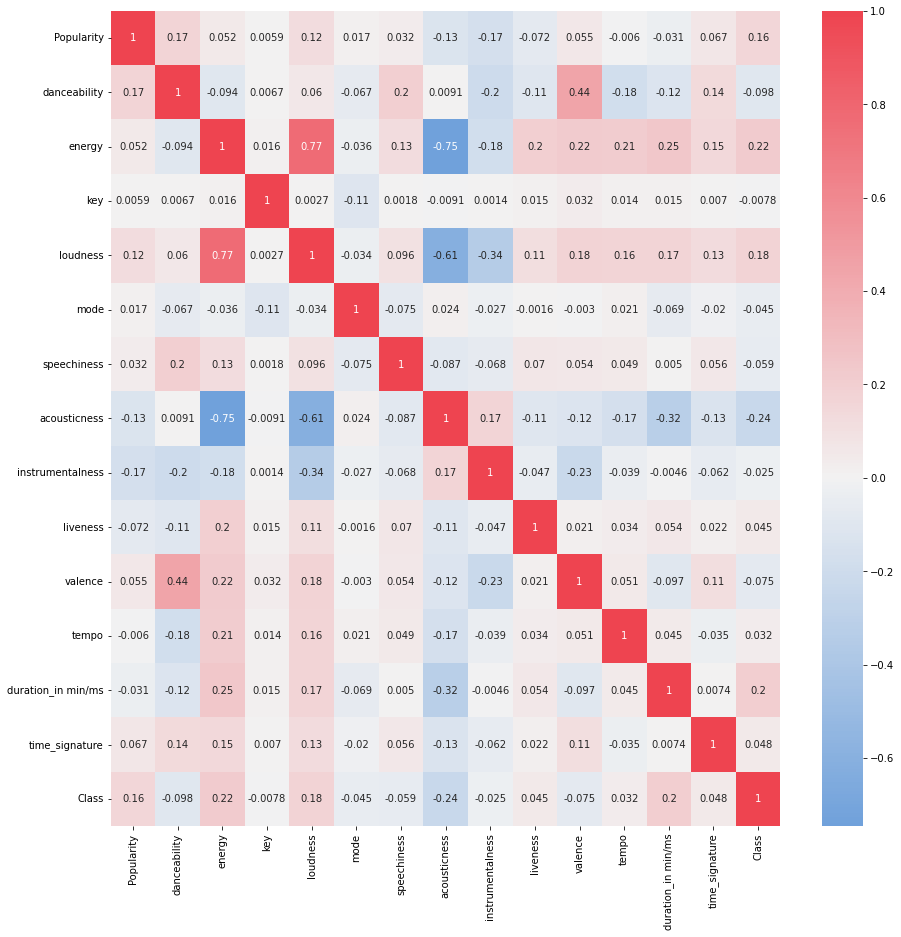

In [14]:
plt.figure(figsize=(15,15))  
sns.heatmap(data.corr(),annot=True, cmap=sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True), center=0)

The features most correlated with the target variable 'Class' (representing genre) are energy, acousticness, and duration, though they are not very correlated. We also see that acousticness is quite negatively correlated with energy, while energy is quite positively correlated with loudness.

In [13]:
miss_values = data.columns[data.isnull().any()]
print(f"Missing values:\n{data[miss_values].isnull().sum()}")


Missing values:
Popularity           428
key                 2014
instrumentalness    4377
dtype: int64
Null values:
Popularity           428
key                 2014
instrumentalness    4377
dtype: int64


There are some missing values which will be taken care of later

## Preprocessing Data

In [5]:
# # One-hot encoding the y values since this is a multiclass classification problem
# enc = LabelBinarizer()
# y = enc.fit_transform(y.reshape(-1, 1))

In [15]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [16]:
# Filling in missing values
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train = imp_mean.fit_transform(X_train)
X_test = imp_mean.transform(X_test)

In [17]:
# Standard Scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
n_samples, n_features = X_train.shape

In [19]:
pca = PCA(n_components = n_features)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Training Models

## Model 1 - Logistic Regression

In [21]:
clf = LogisticRegression(solver='newton-cg', multi_class='ovr')
clf_lr = clf.fit(X_train, y_train)

In [23]:
y_test_pred = clf_lr.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.48344076461435875

In [24]:
labels=['Acoustic', 'Alt', 'Blues', 'Bollywood', 'Country', 'Hip-Hop', 'Indie', 'Instrumental', 'Metal', 'Pop', 'Rock']
print(classification_report(y_test, y_test_pred,target_names=labels))
#best classification performance on instrumental genre

              precision    recall  f1-score   support

    Acoustic       0.65      0.69      0.67       172
         Alt       0.00      0.00      0.00       340
       Blues       0.46      0.29      0.36       340
   Bollywood       0.70      0.62      0.66       104
     Country       0.46      0.62      0.53        84
     Hip-Hop       0.62      0.64      0.63       340
       Indie       0.39      0.21      0.28       626
Instrumental       0.86      0.93      0.89       134
       Metal       0.58      0.51      0.54       473
         Pop       0.42      0.37      0.39       663
        Rock       0.43      0.72      0.54      1223

    accuracy                           0.48      4499
   macro avg       0.51      0.51      0.50      4499
weighted avg       0.45      0.48      0.45      4499



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [37]:
y_test_pred

array([5, 8, 0, ..., 9, 9, 2], dtype=int64)

## Model 2 - Linear Discriminant Analysis

In [44]:
clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [45]:
y_test_pred = clf_lda.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.47699488775283394

In [ ]:
print(classification_report(y_test, y_test_pred,target_names=labels))

## Model 3 - Quadratic Discriminant Analysis

In [15]:
clf_qda = QuadraticDiscriminantAnalysis()
clf_qda.fit(X_train, y_train)

/opt/homebrew/Caskroom/miniconda/base/envs/qcf/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [16]:
y_test_pred = clf_qda.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.4872193820849078

In [ ]:
print(classification_report(y_test, y_test_pred,target_names=labels))

## Model 4 - Naive Bayes

In [17]:
clf_gnb = gnb = GaussianNB()
clf_gnb.fit(X_train, y_train)

GaussianNB()

In [18]:
y_test_pred = clf_gnb.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.4669926650366748

In [ ]:
print(classification_report(y_test, y_test_pred,target_names=labels))

## Model 5 - Support Vector Machine

In [35]:
params_svc = {'kernel':('linear', 'rbf'), 'C':[1, 10], 'decision_function_shape':['ovr']}
svc = SVC()
clf_svc = GridSearchCV(svc, params_svc)

In [36]:
clf_svc.fit(X_train, y_train)

KeyboardInterrupt: 

In [21]:
y_test_pred = clf_svc.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.5298955323405201

In [ ]:
print(classification_report(y_test, y_test_pred,target_names=labels))

## Model 6 - K Nearest Neighbors

In [54]:
params_knn = {'n_neighbors':[1,3,5,10,20,50]}
knn = KNeighborsClassifier()
clf_knn = GridSearchCV(knn, params_knn)
clf_knn.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 10, 20, 50]})

In [55]:
y_test_pred = clf_knn.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.49499888864192043

In [ ]:
print(classification_report(y_test, y_test_pred,target_names=labels))

## Model 7 - Random Forest

In [42]:
rf = RandomForestClassifier(n_jobs=-1)
params_rf = {'max_depth':[3, 4, 5, 6, 7, 8 , 9, 10], 'n_estimators': range(10,100)}
clf_rf = GridSearchCV(rf, params_rf)
clf_rf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': range(10, 100)})

In [43]:
y_test_pred = clf_rf.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.48121804845521227

In [ ]:
print(classification_report(y_test, y_test_pred,target_names=labels))

## Model 8 - Gaussian Mixture Model

## Second Last Model - XGBoost (eXtreme Gradient Boosting)

In [21]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

#setting tree and tree depth
num_round = 50
maxdepth = 8
param = {
  'colsample_bylevel': 1,
  'colsample_bytree': 1,
  'gamma': 0,
  'learning_rate': 0.1, 
  'random_state': 1010,
  'objective': 'multi:softmax', 
  'num_class': 7, 
}

param['tree_method'] = 'gpu_hist'
param['grow_policy'] = 'depthwise'
param['max_depth'] = maxdepth
param['max_leaves'] = 0
param['verbosity'] = 0
param['gpu_id'] = 0
param['updater'] = 'grow_gpu_hist'
param['predictor'] = 'gpu_predictor'

gpu_result = {} 
start_time = time.time()
# Training with the above parameters
xgb.train(param, dtrain, num_round, evals=[(dtest, 'test')], evals_result=gpu_result, verbose_eval=20)

print("GPU Training Time: %s seconds" % (str(time.time() - start_time)))


XGBoostError: [05:11:29] D:\bld\xgboost-split_1637426510059\work\src\tree\tree_updater.cc:20: Unknown tree updater grow_gpu_hist

In [14]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'objective=multi':'softmax',
        'tree_method':'gpu_hist'
        }

xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic', silent=True, nthread=-1, tree_method='gpu_hist')
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=5, scoring='roc_auc', n_jobs=-1, cv=5, verbose=3, random_state=42 )
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\rohan\Anaconda3\envs\quant_general\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rohan\Anaconda3\envs\quant_general\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rohan\Anaconda3\envs\quant_general\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "C:\Users\rohan\Anaconda3\envs\quant_general\lib\site-packages\xgboost\sklearn.py", line 1261, in fit
    callbacks=callbacks,
  File 

XGBoostError: Invalid Input: '_', valid values are: {'approx', 'auto', 'exact', 'gpu_hist', 'hist'}

In [13]:
y_train_pred = random_search.predict(X_train)
print(f"Train accuracy : {accuracy_score(y_train, y_train_pred)}")
y_test_pred = random_search.predict(X_test)
print(f"Test accuracy : {accuracy_score(y_test, y_test_pred)}")

Train accuracy : 0.5619026450322294
Test accuracy : 0.5034452100466771


## Last Model - LightGBM

In [68]:
params_lgbm = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'num_leaves': [50, 100, 200],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'min_split_gain': [0.3, 0.4],
    'subsample': [0.7, 0.8, 0.9],
    'subsample_freq': [20]
}

lgbm = LGBMClassifier()
clf_lgbm = RandomizedSearchCV(lgbm, param_distributions=params, n_iter=20, scoring='accuracy', n_jobs=-1, cv=5, random_state=42 )
clf_lgbm.fit(X_train, y_train)

[LightGBM] [Warning] Unknown parameter objective=multi=m
[LightGBM] [Warning] Unknown parameter: gamma


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 5, 10],
                                        'objective=multi': 'softmax',
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy')

In [69]:
y_test_pred = clf_lgbm.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.4136474772171594

# Using Pycaret for Classification

In [22]:
from pycaret.classification import *

In [26]:
classifier = setup(data = data, target = 'Class',ignore_features = ['Artist Name','Track Name'], fold_shuffle=True, session_id=123) 

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:44:20
Status,. . . . . . . . . . . . . . . . . .,Preprocessing Data


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
Popularity,Numeric
danceability,Numeric
energy,Numeric
key,Categorical
loudness,Numeric
mode,Categorical
speechiness,Numeric
acousticness,Numeric
instrumentalness,Numeric
liveness,Numeric


KeyboardInterrupt: Interrupted by user

In [ ]:
compare_models()

In [ ]:
tuned_gbc = tune_model(dt)